<a href="https://www.kaggle.com/code/htonmoy19/mcc-0-9736-binary-prediction-of-mushrooms?scriptVersionId=194844847" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')
train_data.head(5)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
test_data.head(5)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [5]:
train_data.describe(include='all')

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,3.116945e+06,3116945,3.116941e+06,3116905,2445922,3116933,3116937,2593009,1858510,3116888,...,359922,1136084,3116907,159452,375998,3116921,2988065,267263,3116900,3116945
unique,NaN,2,NaN,74,83,78,26,78,48,63,...,38,60,59,22,24,23,40,32,52,4
top,NaN,p,NaN,x,t,n,f,a,c,w,...,b,s,w,u,w,f,f,k,d,a
freq,NaN,1705396,NaN,1436026,460777,1359542,2569743,646034,1331054,931538,...,165801,327610,1196637,159373,279070,2368820,2477170,107310,2177573,1543321
mean,1.558472e+06,NaN,6.309848e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.997847e+05,NaN,4.657931e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,3.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.792360e+05,NaN,3.320000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.558472e+06,NaN,5.750000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.337708e+06,NaN,8.240000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
missing_val_count_by_column=train_data.isnull().sum()
missing_val_count_by_column1=test_data.isnull().sum()
missing_val_train = missing_val_count_by_column[missing_val_count_by_column > 0]
missing_val_test = missing_val_count_by_column1[missing_val_count_by_column1 > 0]
missing_value_df = pd.DataFrame(missing_val_train)
missing_value_df['test_data'] = missing_val_test
missing_value_df

,0,test_data
cap-diameter,4,7
cap-shape,40,31
cap-surface,671023,446904
cap-color,12,13
does-bruise-or-bleed,8,10
gill-attachment,523936,349821
gill-spacing,1258435,839595
gill-color,57,49
stem-root,2757023,1838012
stem-surface,1980861,1321488


In [7]:
# percentage of missing columns
Missing = train_data.isna().mean()*100
Missing_col = Missing[Missing>0]
Missing_col.sort_values(ascending=False,inplace =True)
Missing_col

veil-type               94.884350
spore-print-color       91.425482
stem-root               88.452732
veil-color              87.936970
stem-surface            63.551362
gill-spacing            40.373988
cap-surface             21.528227
gill-attachment         16.809280
ring-type                4.134818
gill-color               0.001829
habitat                  0.001444
cap-shape                0.001283
stem-color               0.001219
has-ring                 0.000770
cap-color                0.000385
does-bruise-or-bleed     0.000257
cap-diameter             0.000128
dtype: float64

In [9]:
display(train_data.columns)
display(train_data.shape)

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

(3116945, 22)

In [10]:
display(test_data.columns)
display(test_data.shape)

Index(['id', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

(2077964, 21)

In [11]:
cols_above_60percent_missing_val = ['stem-root','stem-surface','veil-type','veil-color','spore-print-color']
train_data = train_data.drop(cols_above_60percent_missing_val, axis=1)
display(train_data.columns)
display(train_data.shape)

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

(3116945, 17)

In [12]:
test_data = test_data.drop(cols_above_60percent_missing_val, axis=1)
test_data.shape

(2077964, 16)

In [25]:
train_data['cap-shape'].unique()
# it seems there are inconsistencies in data entry.

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', 'w', 'k', 'l',
       '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

In [26]:
train_data['gill-color'].unique()

array(['w', 'n', 'g', 'k', 'y', 'f', 'p', 'o', 'b', 'u', 'e', 'r', 'd',
       't', '3.45', 'z', '5', '3.39', 'season', 'h', 'x', 's', '4',
       'class', 'c', 'm', 'spacing', '0.92', '18.12', 'l', 'does w', 'a',
       '7.59', '8.06', '6.19', 'has-ring', '4.49', '9.46', '5.01',
       'ring-type', '3.4', 'i', '17', '10.07', 'stem-root', '20.6',
       'spore-print-color', '18.03', 'does-bruise-or-bleed', '8.83',
       'habitat', '10.21', '4.64', '6.4', 'is y', 'e y', '1.91', 'does n',
       '16.41', '6.41', 'veil-type', '20.44', '8.37'], dtype=object)

In [27]:
train_data['season'].unique()

array(['a', 'w', 'u', 's'], dtype=object)

In [28]:
# categorical columns to preprocess
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment'
                      ,'gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat','season'] 
# numerical columns to preprocess
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']

In [29]:
cols_to_clean = ['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment',
                'gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat'] 

In [30]:
# let's define valid categories for each column
valid_categories = {
    'cap-shape': ['f', 'x', 'p', 'b', 'o', 'c', 's'],
    'cap-surface': ['s', 'h', 'y', 'l'],
    'cap-color': ['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k'],
    'does-bruise-or-bleed': ['f', 't'],
    'gill-attachment': ['a', 'x', 's', 'd'],
    'gill-spacing': ['c', 'd'],
    'gill-color': ['w', 'n', 'g', 'k'],
    'stem-color': ['w', 'o', 'n', 'y', 'e'],
    'has-ring': ['f', 't'],
    'ring-type': ['f', 'z', 'e', 'p'],
    'habitat': ['d', 'l', 'g', 'h', 'p', 'm', 'u']}

In [31]:
# Replace unexpected values with NaN
for col in cols_to_clean:
    train_data[col] = train_data[col].apply(lambda x: x if x in valid_categories[col] else np.nan)
    test_data[col] = test_data[col].apply(lambda x: x if x in valid_categories[col] else np.nan)

In [32]:
for col in numerical_columns:
    train_data[col] = train_data[col].fillna(train_data[col].median())
    test_data[col] = test_data[col].fillna(test_data[col].median())

In [33]:
for col in categorical_columns:
    mode_train = train_data[col].mode()[0]
    train_data[col] = train_data[col].fillna(mode_train)
    mode_test = test_data[col].mode()[0]
    test_data[col] = test_data[col].fillna(mode_test)

In [34]:
print("There are", train_data.isnull().sum().sum(), "missing value in train_data")
print("There are", test_data.isnull().sum().sum(), "missing value in test_data")

There are 0 missing value in train_data
There are 0 missing value in test_data


In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

scaler = StandardScaler()
LE = LabelEncoder()

train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])

train_data['class'] = LE.fit_transform(train_data['class'])

In [37]:
# feature and target selection
cols = numerical_columns + categorical_columns
X = train_data[cols]
y = train_data['class']
test_data = test_data[cols]
X.head(5)

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
0,0.534605,-0.680926,0.523282,f,s,u,f,a,c,w,w,f,f,d,a
1,-0.386405,-0.577213,-0.577333,x,h,o,f,a,c,n,o,t,z,d,w
2,0.135286,0.185819,-0.151169,f,s,b,f,x,c,w,n,f,f,l,w
3,-0.521659,-0.810568,-0.571157,f,y,g,f,s,c,g,w,f,f,d,u
4,-0.098724,-1.103187,-0.345105,x,l,w,f,d,c,w,w,f,f,g,a


In [38]:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print('Categorical Variables:')
print(cat_cols)

Categorical Variables:
['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


In [48]:
OHE = OneHotEncoder(sparse_output=False)
X_encoded_cat = pd.DataFrame(OHE.fit_transform(X[cat_cols]))
test_encoded_cat = pd.DataFrame(OHE.transform(test_data[cat_cols]))
X_encoded_cat.index = X.index
test_encoded_cat.index = test_data.index

X_num = X.drop(cat_cols, axis=1)
test_num = test_data.drop(cat_cols, axis=1)

X_encoded = pd.concat([X_num, X_encoded_cat], axis=1)
test_encoded = pd.concat([test_num, test_encoded_cat], axis=1)

X_encoded.columns = X_encoded.columns.astype(str)
test_encoded.columns = test_encoded.columns.astype(str)

display(X_encoded.shape)
display(y.shape)
display(test_encoded.shape)

(3116945, 59)

(3116945,)

(2077964, 59)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'stem-width distribution')

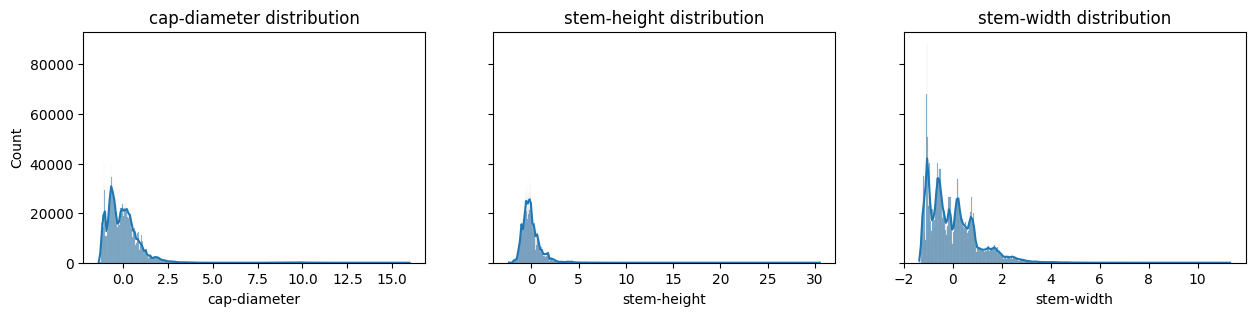

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
sns.histplot(X['cap-diameter'], kde=True ,ax = ax1).set_title('cap-diameter distribution')
sns.histplot(X['stem-height'], kde=True, ax = ax2).set_title('stem-height distribution')
sns.histplot(X['stem-width'], kde=True, ax = ax3).set_title('stem-width distribution')

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state =365) 

In [54]:
%%time
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_jobs=-1, random_state=365)
model_rfc.fit(X_train,y_train)
pred_1 = model_rfc.predict(X_valid)

CPU times: user 21min 55s, sys: 3.75 s, total: 21min 59s
Wall time: 5min 41s


In [55]:
accuracy = accuracy_score(y_valid, pred_1)
classification_rep = classification_report(y_valid, pred_1)

print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.987

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



In [56]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_valid, pred_1)
print(f'Matthews Correlation Coefficient (MCC): {mcc}')

Matthews Correlation Coefficient (MCC): 0.9742369561255859


In [31]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(colsample_bylevel= 0.9,
                    learning_rate=0.2,
                    colsample_bytree = 0.8, 
                    gamma=0.1,
                    max_depth= 10,
                    min_child_weight= 1,
                    n_estimators= 250,
                    nthread= 4,n_jobs=8,
                    random_state= 365)
model_xgb.fit(X_train, y_train)

pred_2 = model_xgb.predict(X_valid)

accuracy = accuracy_score(y_valid, pred_2)
classification_rep = classification_report(y_valid, pred_2)

print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.987

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



In [37]:
mcc = matthews_corrcoef(y_valid, pred_2)
print(f'Matthews Correlation Coefficient (MCC): {mcc}')

Matthews Correlation Coefficient (MCC): 0.9736135047413904


In [58]:
%%time
# let's train the whole dataset
model_rfc.fit(X_encoded,y)

CPU times: user 28min 30s, sys: 4.66 s, total: 28min 35s
Wall time: 7min 25s


RandomForestClassifier(n_jobs=-1, random_state=365)

In [60]:
prediction = model_rfc.predict(test_encoded)
prediction

array([0, 1, 1, ..., 1, 0, 0])

In [61]:
sample_submission.head()

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


In [62]:
prediction_class = LE.inverse_transform(prediction)
sample_submission['class'] = prediction_class
sample_submission.head(5)

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


In [63]:
sample_submission.to_csv("submission.csv", index=False)